# 训练自己的文本识别模型

同济子豪兄 2023-6-20

## 进入MMOCR主目录

In [1]:
import os
os.chdir('mmocr')

## 导入工具包

In [2]:
import mmcv
import matplotlib.pyplot as plt
%matplotlib inline

## 查看样例数据集的图片

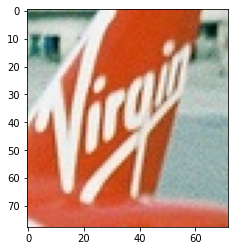

In [3]:
img = mmcv.imread('tests/data/rec_toy_dataset/imgs/1058891.jpg')
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

## 查看样例数据集的标注

In [4]:
!cat tests/data/rec_toy_dataset/labels.json

{
    "metainfo": {
        "dataset_type": "TextRecogDataset",
        "task_name": "textrecog"
    },
    "data_list": [
        {
            "instances": [
                {
                    "text": "GRAND"
                }
            ],
            "img_path": "1223731.jpg"
        },
        {
            "instances": [
                {
                    "text": "HOTEL"
                }
            ],
            "img_path": "1223733.jpg"
        },
        {
            "instances": [
                {
                    "text": "HOTEL"
                }
            ],
            "img_path": "1223732.jpg"
        },
        {
            "instances": [
                {
                    "text": "PACIFIC"
                }
            ],
            "img_path": "1223729.jpg"
        },
        {
            "instances": [
                {
                    "text": "03/09/2009"
                }
            ],
            "img_path": "1036169.jpg"
        },
     

## config配置文件

In [5]:
from mmengine import Config

cfg = Config.fromfile('configs/textrecog/sar/sar_resnet31_parallel-decoder_5e_toy.py')

In [6]:
cfg.work_dir = 'work_dirs/sar_resnet31_parallel-decoder_5e_toy/'
cfg.optim_wrapper.optimizer.lr = 1e-3
cfg.train_dataloader.batch_size = 1
cfg.train_cfg.max_epochs = 100 # 训练总轮数
cfg.default_hooks.checkpoint.interval = 10 # 多少轮保存一次模型
cfg.param_scheduler = None
cfg.randomness = dict(seed=0)

## 查看config文件

In [7]:
# print(cfg.pretty_text)

## 训练模型，权重文件保存在`work_dirs`目录下

In [ ]:
from mmengine.runner import Runner
import time

cfg.visualizer.name = f'{time.localtime()}'

runner = Runner.from_cfg(cfg)
runner.train()

06/20 16:42:38 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.7.10 (default, Jun  4 2021, 14:48:32) [GCC 7.5.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: NVIDIA GeForce RTX 3060
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.2, V11.2.152
    GCC: gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0
    PyTorch: 1.10.1+cu113
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bfa13efb658fe15dc9b41f0740)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-